# Gold Price Prediction Task Using Yearly Data

## 1. Import libraries



In [94]:
# Basic libraries for data work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


# Machine learning models and tools
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Utility
import os
from datetime import datetime

# Make plots appear inline when running in Jupyter
%matplotlib inline

## 2. Load the data


In [63]:
csv_path = r"E:\Lectures\Level 3 lectures\Data Analytics Lab Course\New folder\annual_gold_rate.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}. Upload the dataset before running.")

df = pd.read_csv(csv_path)

print('Dataset shape:', df.shape)
df.head()

Dataset shape: (43, 7)


,Date,USD,EUR,GBP,INR,AED,CNY
0,1980-12-31,614.50,378.19461,263.80259,4831.74943,2278.36795,NaN
1,1981-12-31,459.26,360.90588,227.01948,3966.64790,1691.03194,NaN
2,1982-12-31,375.30,345.59742,215.53232,3553.62680,1378.72895,NaN
3,1983-12-30,423.66,439.89318,279.24936,4270.42821,1557.45790,NaN
4,1984-12-31,360.78,425.91000,269.81553,4067.60433,1324.72272,NaN


## 3. Choose the date and price columns


In [79]:
date_candidates = [c for c in df.columns if 'date' in c.lower()]
price_candidates = [c for c in df.columns if any(x in c.lower() for x in ['usd','eur','gbp','inr','aed','cny','price','rate','value'])]

print('Date candidates:', date_candidates)
print('Price candidates:', price_candidates)

if date_candidates:
    date_col = date_candidates[0]
else:
    date_col = 'Date'  

price_col = price_candidates[0] if price_candidates else df.columns[-1]

print(f"Using date column: {date_col}, using price column: {price_col}")

Date candidates: ['Date']
Price candidates: ['Price', 'EUR', 'GBP', 'INR', 'AED', 'CNY']
Using date column: Date, using price column: Price


## 4. Clean and prepare data

In [80]:
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

n_bad_dates = df[date_col].isna().sum()
print('Bad dates:', n_bad_dates)
n_bad_prices = df[price_col].isna().sum()
print('Non-numeric prices:', n_bad_prices)

df = df.dropna(subset=[date_col, price_col]).copy()

df['CNY'] = df['CNY'].fillna(df['CNY'].median())

df = df.sort_values(by=date_col).reset_index(drop=True)

df = df.rename(columns={date_col: 'Date', price_col: 'Price'})

# Show cleaned sample
print('Cleaned dataset sample:')
df.head()

Bad dates: 0
Non-numeric prices: 0
Cleaned dataset sample:


,Date,Price,EUR,GBP,INR,AED,CNY,Year
0,1980-12-31,614.50,378.19461,263.80259,4831.74943,2278.36795,5138.873708,1980
1,1981-12-31,459.26,360.90588,227.01948,3966.64790,1691.03194,5138.873708,1981
2,1982-12-31,375.30,345.59742,215.53232,3553.62680,1378.72895,5138.873708,1982
3,1983-12-30,423.66,439.89318,279.24936,4270.42821,1557.45790,5138.873708,1983
4,1984-12-31,360.78,425.91000,269.81553,4067.60433,1324.72272,5138.873708,1984


## 5. Feature Engineering for Yearly Data:


In [ ]:
data = df.copy()

df['Year'] = df['Date'].dt.year

data['Lag1'] = data['Price'].shift(1)
data['Rolling3'] = data['Price'].rolling(window=3, min_periods=1).mean().shift(1)

data = data.dropna().reset_index(drop=True)

print('Features sample:')
data.head()

Features sample:


,Date,Price,EUR,GBP,INR,AED,CNY,Year,Lag1,Rolling3
0,1981-12-31,459.26,360.90588,227.01948,3966.64790,1691.03194,5138.873708,1981,614.50,614.500000
1,1982-12-31,375.30,345.59742,215.53232,3553.62680,1378.72895,5138.873708,1982,459.26,536.880000
2,1983-12-30,423.66,439.89318,279.24936,4270.42821,1557.45790,5138.873708,1983,375.30,483.020000
3,1984-12-31,360.78,425.91000,269.81553,4067.60433,1324.72272,5138.873708,1984,423.66,419.406667
4,1985-12-31,317.30,394.08922,246.28501,3887.39270,1162.19778,926.645180,1985,360.78,386.580000


## 6. Exploratory Data Analysis (EDA)


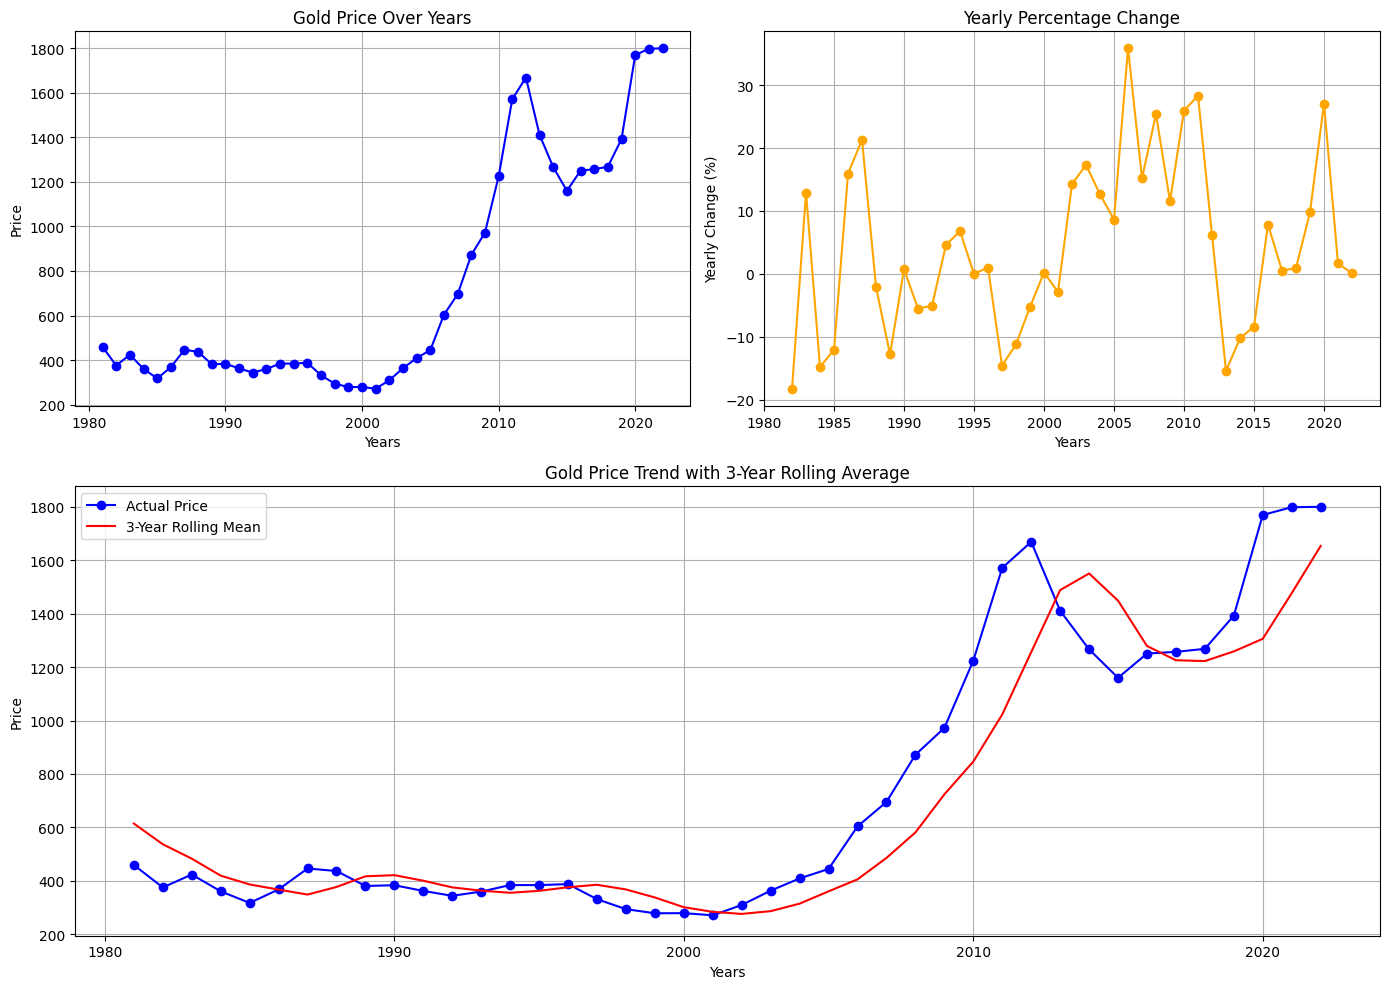


Price statistics:
count      43.000000
mean      738.428605
std       509.492665
min       271.040000
25%       362.790000
50%       436.860000
75%      1237.660000
max      1800.090000
Name: Price, dtype: float64


In [96]:
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(data['Year'], data['Price'], marker='o', color='blue')
ax1.set_title('Gold Price Over Years')
ax1.set_xlabel('Years')
ax1.set_ylabel('Price')
ax1.grid(True)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(data['Year'], data['Yearly_Change'], marker='o', color='orange')
ax2.set_title('Yearly Percentage Change')
ax2.set_xlabel('Years')
ax2.set_ylabel('Yearly Change (%)')
ax2.grid(True)


ax3 = fig.add_subplot(gs[1, :])
ax3.plot(data['Year'], data['Price'], marker='o', color='blue', label='Actual Price')
ax3.plot(data['Year'], data['Rolling3'], color='red', label='3-Year Rolling Mean')
ax3.set_title('Gold Price Trend with 3-Year Rolling Average')
ax3.set_xlabel('Years')
ax3.set_ylabel('Price')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


print('\nPrice statistics:')
print(df['Price'].describe())


## 7. Model Preparation:

In [ ]:
split_fraction = 0.8
split_idx = int(len(data) * split_fraction)

train = data.iloc[:split_idx].copy()
test = data.iloc[split_idx:].copy()

print(f"Train rows: {len(train)}, Test rows: {len(test)}")


feature_cols = ['Lag1', 'Rolling3', 'Year'] 
X_train = train[feature_cols]
y_train = train['Price']
X_test = test[feature_cols]
y_test = test['Price']

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Train rows: 33, Test rows: 9
X_train shape: (33, 3)
y_train shape: (33,)
X_test shape: (9, 3)
y_test shape: (9,)


## 8. Model Training:

In [101]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit models to training data
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions on the test set
pred_lr = lr.predict(X_test)
pred_rf = rf.predict(X_test)

## 9. Model Evaluation

In [102]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

metrics_lr = evaluate(y_test, pred_lr)
metrics_rf = evaluate(y_test, pred_rf)

print('Linear Regression metrics:')
for k,v in metrics_lr.items():
    print(f'  {k}: {v:.4f}')

print('\nRandom Forest metrics:')
for k,v in metrics_rf.items():
    print(f'  {k}: {v:.4f}')

Linear Regression metrics:
  MAE: 156.1107
  RMSE: 192.5958
  R2: 0.4207

Random Forest metrics:
  MAE: 259.6243
  RMSE: 266.9024
  R2: -0.1125


## 8. Visualization:

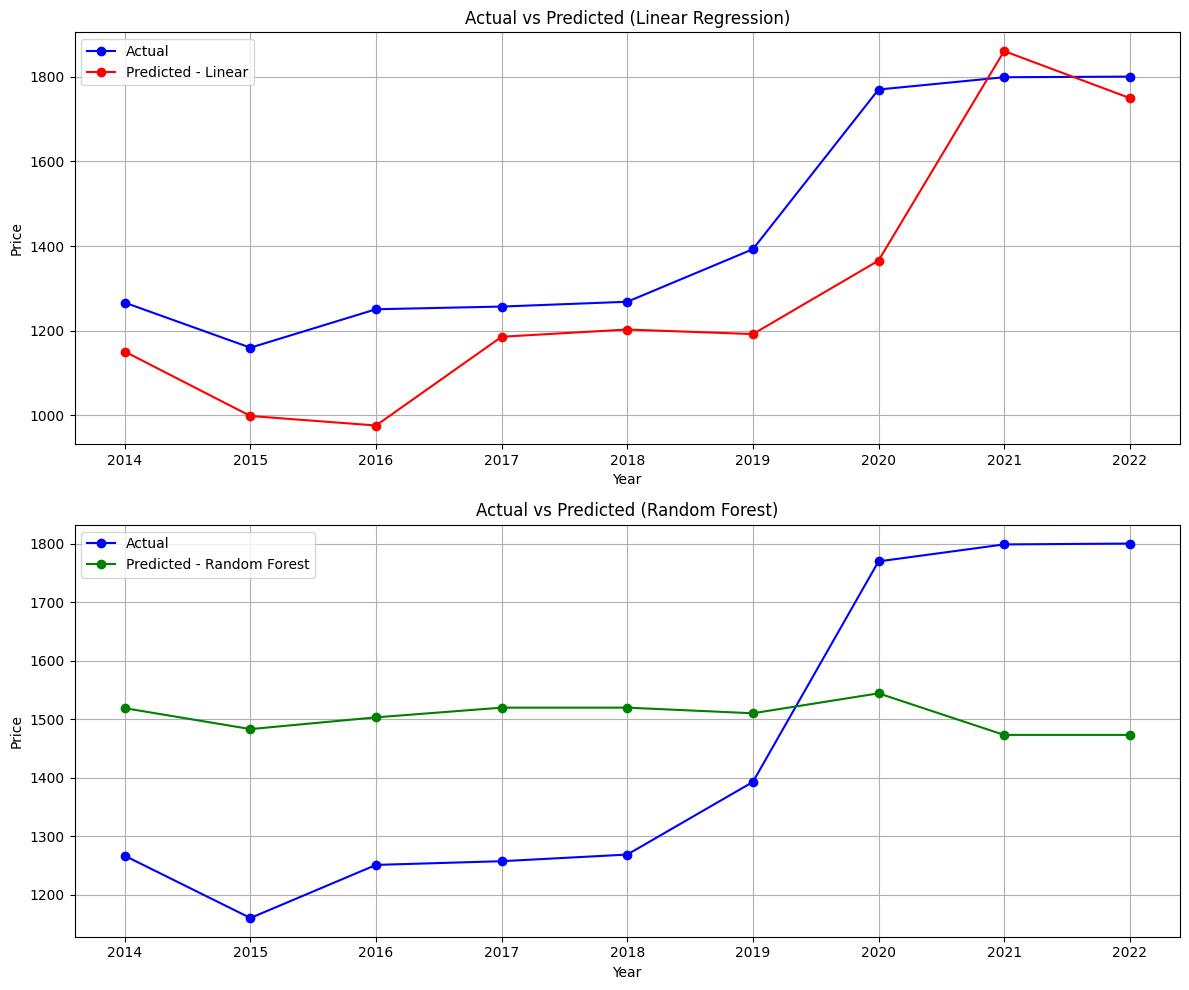

In [104]:
# ==============================
# 8. Visualization: Actual vs Predicted
# ==============================

years_test = test['Year'].reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ------------------------------
# 1. Linear Regression
# ------------------------------
axes[0].plot(years_test, y_test_reset, marker='o', label='Actual', color='blue')
axes[0].plot(years_test, pred_lr, marker='o', label='Predicted - Linear', color='red')
axes[0].set_title('Actual vs Predicted (Linear Regression)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# ------------------------------
# 2. Random Forest
# ------------------------------
axes[1].plot(years_test, y_test_reset, marker='o', label='Actual', color='blue')
axes[1].plot(years_test, pred_rf, marker='o', label='Predicted - Random Forest', color='green')
axes[1].set_title('Actual vs Predicted (Random Forest)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
